# Practice Session 01+02: Data preparation

Author: <font color="blue">Alan Le Roux Osorio</font>

E-mail: <font color="blue">alan.leroux01@estudiant.upf.edu</font>

Date: <font color="blue">01/10/2025</font>

# 1. Exploratory data analysis 

In [1]:
# LEAVE AS-IS

import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [3]:
#We use the describe() function to get a summary of the dataset
input_dataset.describe()

,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,...,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE
count,9690.000000,7.682000e+03,8868.000000,8841.000000,8846.000000,8817.000000,8866.000000,8535.000000,8868.000000,8841.000000,...,9979.000000,9999.000000,9998.000000,9992.00000,9989.000000,9987.000000,9979.000000,9.179000e+03,7682.000000,9179.000000
mean,750.484211,2.016698e+07,3481.825663,3649.957795,3653.426959,3269.440625,3673.368341,3427.689578,154.852210,142.567877,...,102.268390,10.807785,10.587317,11.71326,11.554371,12.510864,12.979012,2.013605e+07,25.338323,62.368341
std,979.710272,1.092577e+04,6364.542706,6444.357603,6382.603999,5675.546606,6589.399406,5885.423022,218.250590,200.574371,...,65.459494,75.834602,36.995965,44.43260,34.175962,38.875688,39.528025,4.346958e+04,12.817354,52.072895
min,15.000000,2.012100e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.992080e+07,-5.000000,0.000000
25%,297.000000,2.016080e+07,51.923114,46.542538,44.900850,35.689415,45.358936,75.256077,26.700001,20.000000,...,66.940000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.012033e+07,17.000000,21.000000
50%,393.000000,2.017060e+07,1208.728050,1294.950800,1310.674800,1176.539300,1287.094000,1277.116300,84.049999,74.900002,...,94.990000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.015032e+07,22.000000,48.000000
75%,609.000000,2.017100e+07,4249.164900,4546.064900,4579.454700,3983.978000,4541.869250,4278.348650,199.225000,186.200000,...,121.140000,0.620000,0.620000,7.00000,9.000000,9.310000,11.660000,2.017063e+07,31.000000,84.000000
max,9057.000000,2.019050e+07,127017.590000,111948.840000,111948.840000,87856.414000,121834.810000,90550.609000,4220.100100,3132.100100,...,1187.300000,6440.000000,1360.000000,2466.00000,455.000000,1258.000000,1000.000000,2.019042e+07,78.000000,320.000000


Mean is the average value of each column. Std is the standard deviation, which indicates how spread the data is around the mean. Min is the smallest value recorded in the column, while Max is the largest value. The 25%, 50%, and 75% correspond to the first quartile, the median (second quartile), and the third quartile, respectively.

Count is the number 

In [4]:

column_info = []
# We iterate through each column in the DataFrame
# For each column, we  get its name, type, number of distinct values, number of non-null values, and size
for column in input_dataset.columns:
    col_type = input_dataset[column].dtype
    num_distinct = input_dataset[column].nunique()
    num_non_null = input_dataset[column].count()
    col_size = input_dataset[column].size
    # We append the information as a dictionary to the list
    column_info.append({
        'column_name': column,
        'type': col_type,
        'num_distinct': num_distinct,
        'num_non_null': num_non_null,
        'size': col_size
    })
# We convert the list of dictionaries to a DataFrame for better visualization, then we display.
column_type_df = pd.DataFrame(column_info)
display(column_type_df)

,column_name,type,num_distinct,num_non_null,size
0,PURCHASED_DEVICE,object,101,9853,10000
1,DEVICE_VALUE,float64,368,9690,10000
2,LAST_DEVICE_CHANGE,float64,76,7682,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,8868,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,8841,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,8846,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,8817,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,8866,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,8535,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,8868,10000


In [5]:
# We set float display format to one decimal place, the hint was given in the statement.
pd.options.display.float_format = '{:.1f}'.format
# For each float column, we compute min, median, and max, ignoring NaN values.This functions were also given by the statement

float_columns = input_dataset.select_dtypes(include=['float64']).columns
#We create a list to hold the statistics for each float column
stats = []
for col in float_columns:
    stats.append({
        'column_name': col,
        'min': np.nanmin(input_dataset[col]),
        'median': np.nanmedian(input_dataset[col]),
        'max': np.nanmax(input_dataset[col])
    })

float_stats_df = pd.DataFrame(stats)
display(float_stats_df)

,column_name,min,median,max
0,DEVICE_VALUE,15.0,393.0,9057.0
1,LAST_DEVICE_CHANGE,20121001.0,20170601.0,20190501.0
2,DATA_TRAFFIC_MONTH_1,0.0,1208.7,127017.6
3,DATA_TRAFFIC_MONTH_2,0.0,1295.0,111948.8
4,DATA_TRAFFIC_MONTH_3,0.0,1310.7,111948.8
5,DATA_TRAFFIC_MONTH_4,0.0,1176.5,87856.4
6,DATA_TRAFFIC_MONTH_5,0.0,1287.1,121834.8
7,DATA_TRAFFIC_MONTH_6,0.0,1277.1,90550.6
8,VOICE_TRAFFIC_MONTH_1,0.0,84.0,4220.1
9,VOICE_TRAFFIC_MONTH_2,0.0,74.9,3132.1


## 1.2. Inventory of device models

In [6]:
# Census of PREVIOUS_DEVICE_MODEL
# We use value_counts to get the frequency of each unique value in the PREVIOUS_DEVICE_MODEL column, including NaN values.
model_counts = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts(dropna=False).reset_index()
model_counts.columns = ['PREVIOUS_DEVICE_MODEL', 'count']
display(model_counts)

# Census of PREVIOUS_DEVICE_BRAND
brand_counts = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts(dropna=False).reset_index()
brand_counts.columns = ['PREVIOUS_DEVICE_BRAND', 'count']
display(brand_counts)

,PREVIOUS_DEVICE_MODEL,count
0,NaN,3831
1,iPhone 7,425
2,iPhone 6,250
3,Samsung Galaxy J5,243
4,iPhone 6S,212
...,...,...
576,LG Optimus L3 II,1
577,"Lenovo S930,Lenovo S939",1
578,Samsung Corby II,1
579,SGH-U600,1


,PREVIOUS_DEVICE_BRAND,count
0,NaN,3831
1,Samsung,1877
2,Outros,1592
3,Apple,1548
4,Motorola,638
5,LG,514


Apple may have a few very popular models (like the iPhone 7) that concentrate a large number of users. Samsung on the other hand maybe  offers a wider variety of devices across different markets and price ranges, so no unique Samsung device is more popular but it might be more used

# 2. Feature engineering

## 2.1. Missing values management

In [7]:

# We create a list to hold the information about NaN percentages for each column
nan_info = []
total_rows = len(input_dataset) #Calculate the length of the dataset
# We iterate through each column in the DataFrame
for col in input_dataset.columns:
    #We calculate the number of NaN values in the column
    num_nan = input_dataset[col].isna().sum()
    if num_nan > 0:
        #We calculate the percentage of NaN and non-NaN values
        pct_nan = num_nan / total_rows
        pct_non_nan = 1 - pct_nan
        nan_info.append({
            'column_name': col,
            'pct_nan': pct_nan,
            'pct_non_nan': pct_non_nan
        })

nan_df = pd.DataFrame(nan_info)
nan_df['pct_nan'] = nan_df['pct_nan'].map('{:,.2%}'.format)
nan_df['pct_non_nan'] = nan_df['pct_non_nan'].map('{:,.2%}'.format)
display(nan_df)


,column_name,pct_nan,pct_non_nan
0,PURCHASED_DEVICE,1.47%,98.53%
1,DEVICE_VALUE,3.10%,96.90%
2,LAST_DEVICE_CHANGE,23.18%,76.82%
3,DATA_TRAFFIC_MONTH_1,11.32%,88.68%
4,DATA_TRAFFIC_MONTH_2,11.59%,88.41%
5,DATA_TRAFFIC_MONTH_3,11.54%,88.46%
6,DATA_TRAFFIC_MONTH_4,11.83%,88.17%
7,DATA_TRAFFIC_MONTH_5,11.34%,88.66%
8,DATA_TRAFFIC_MONTH_6,14.65%,85.35%
9,VOICE_TRAFFIC_MONTH_1,11.32%,88.68%


The percentage of nan values decreases for variables capturing months 1, 2, 3, 4, 5, 6 because maybe  more recent months (closer to the purchase event) are more likely to have complete data, while older months may have missing records due to customers joining later or incomplete historical data.

In [8]:
# We remove rows where PURCHASED_DEVICE or PREVIOUS_DEVICE_MODEL is NaN
input_dataset_cleaned = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'PREVIOUS_DEVICE_MODEL'])

In [9]:
#We create a list to hold the columns we want to fill NaNs with 0
columns_to_fill = []
#We use list comprehension to generate the column names for months 1 to 6 for each type of data
columns_to_fill += [f"DATA_TRAFFIC_MONTH_{i}" for i in range(1, 7)]
columns_to_fill += [f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)]
columns_to_fill += [f"BILLING_MONTH_{i}" for i in range(1, 7)]
columns_to_fill += [f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)]
# We create a copy of the cleaned dataset to perform imputations

dataset_imputed = input_dataset_cleaned.copy()
dataset_imputed[columns_to_fill] = dataset_imputed[columns_to_fill].fillna(0)

In [10]:
# For LINE_ACTIVATION_DATE, we fill nans with the corresponding LAST_DEVICE_CHANGE value

dataset_imputed["LINE_ACTIVATION_DATE"] = dataset_imputed["LINE_ACTIVATION_DATE"].fillna(
    dataset_imputed["LAST_DEVICE_CHANGE"]
)


In [11]:
#  header and first five rows of the processed dataset
display(dataset_imputed.head())

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.2,530.8,530.8,781.1,399.0,1169.4,47.5,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.2,272.3,272.3,704.9,412.7,365.1,3.7,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.6,264.1,264.1,348.5,380.4,250.7,26.1,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.5,836.1,836.1,691.6,146.8,302.5,175.7,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.1,2659.1,2659.1,2435.0,2054.0,1553.1,383.9,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [12]:
# we compute the number of rows in the original and computed datasets
original_rows = len(input_dataset)
cleaned_rows = len(dataset_imputed)
pct_dropped = 100 * (original_rows - cleaned_rows) / original_rows

print(f"Original dataset rows: {original_rows}")
print(f"Cleaned dataset rows: {cleaned_rows}")
print(f"Percentage of rows dropped: {pct_dropped:.2f}%")

# Columns that still contain NaN values in the cleaned dataset
nan_columns = dataset_imputed.columns[dataset_imputed.isna().any()].tolist()
print("Columns with remaining NaN values:", nan_columns)

Original dataset rows: 10000
Cleaned dataset rows: 6083
Percentage of rows dropped: 39.17%
Columns with remaining NaN values: ['DEVICE_VALUE', 'LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations



<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

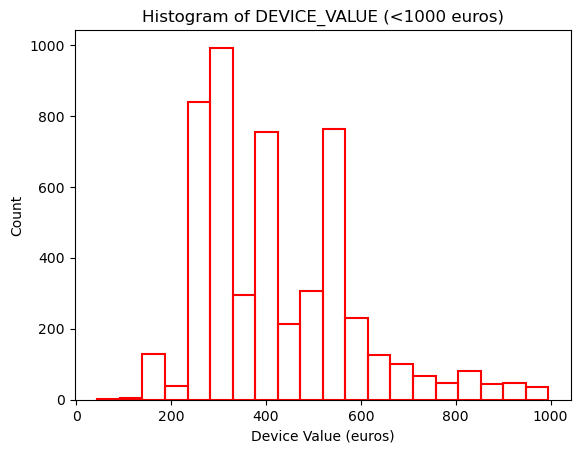

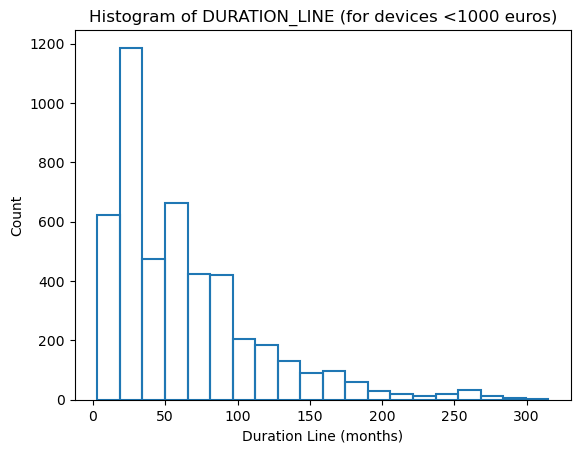

In [13]:
# We filter the dataset to include only devices costing less than 1000 euro
filtered_df = dataset_imputed[dataset_imputed['DEVICE_VALUE'] < 1000]

# Then we plot histogram for DEVICE_VALUE
ax1 = sns.histplot(filtered_df['DEVICE_VALUE'],color = 'red', bins=20,fill = False)
ax1.set(title='Histogram of DEVICE_VALUE (<1000 euros)', xlabel='Device Value (euros)', ylabel='Count')
plt.show()

# Afain we plot histogram for DURATION_LINE
ax2 = sns.histplot(filtered_df['DURATION_LINE'], bins=20, fill = False)
ax2.set(title='Histogram of DURATION_LINE (for devices <1000 euros)', xlabel='Duration Line (months)', ylabel='Count')
plt.show()

The device value histogram seems to follow a normal distribution as there are more devices concentrated in the middle range prices.Maybe a little right skewed.
The duration line histogram seems to follow an exponential as there are a lot of devices that have duration line near zero and the plot is clearly right skewed.

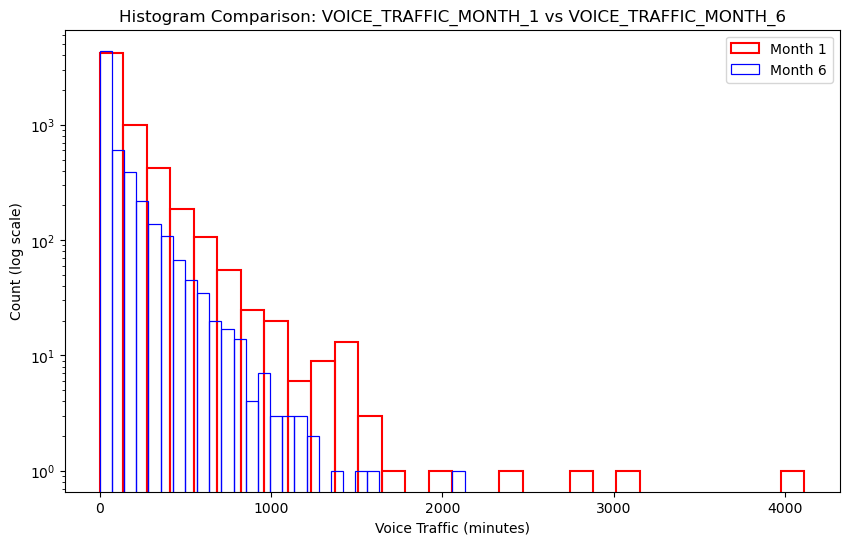

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_imputed['VOICE_TRAFFIC_MONTH_1'], bins=30, color='red', label='Month 1', fill=False)
sns.histplot(dataset_imputed['VOICE_TRAFFIC_MONTH_6'], bins=30, color='blue', label='Month 6', fill=False)
plt.yscale('log')
plt.title('Histogram Comparison: VOICE_TRAFFIC_MONTH_1 vs VOICE_TRAFFIC_MONTH_6')
plt.xlabel('Voice Traffic (minutes)')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()

With voice traffic, both in month 1 and 6 have a very similar distribution and month 1 has a wider range of values, while month 6 is more conctrated on low values.

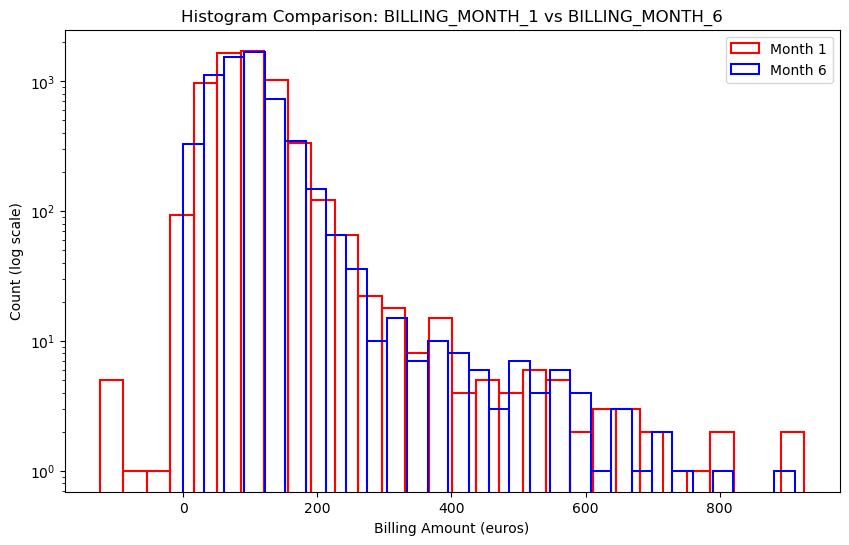

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_imputed['BILLING_MONTH_1'], bins=30, color='red', label='Month 1', fill=False)
sns.histplot(dataset_imputed['BILLING_MONTH_6'], bins=30, color='blue', label='Month 6', fill=False)
plt.yscale('log')
plt.title('Histogram Comparison: BILLING_MONTH_1 vs BILLING_MONTH_6')
plt.xlabel('Billing Amount (euros)')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()

Both billiing month 1 and 6 seem to follow a very similar distribution but again month 1 has a wider range of values and month 6 has more concentrated values.


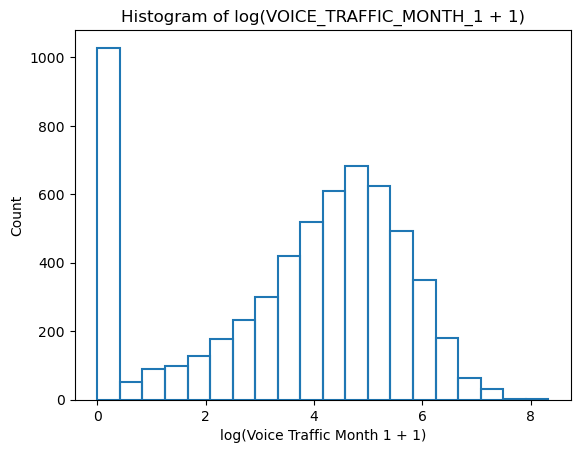

In [16]:

# We use np.log1p to handle zero values appropriately
voice_traffic_log = np.log1p(dataset_imputed["VOICE_TRAFFIC_MONTH_1"])
# Plot histogram of the log-transformed data
ax = sns.histplot(voice_traffic_log, bins=20, fill=False)
ax.set(title="Histogram of log(VOICE_TRAFFIC_MONTH_1 + 1)", xlabel="log(Voice Traffic Month 1 + 1)", ylabel="Count")
plt.show()

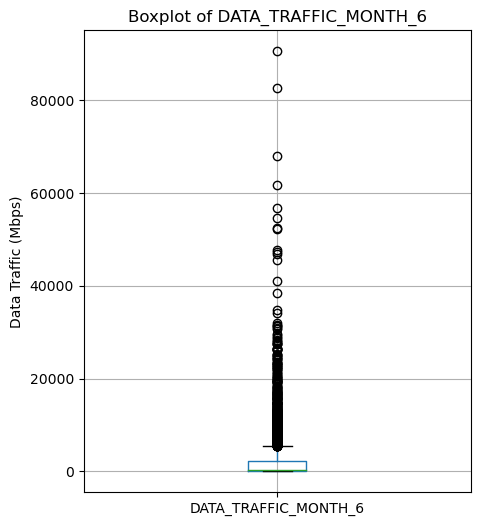

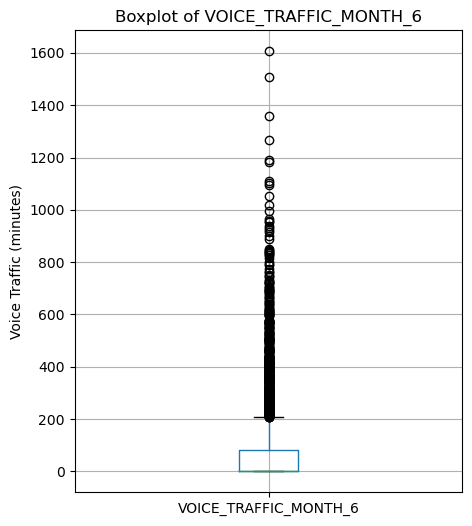

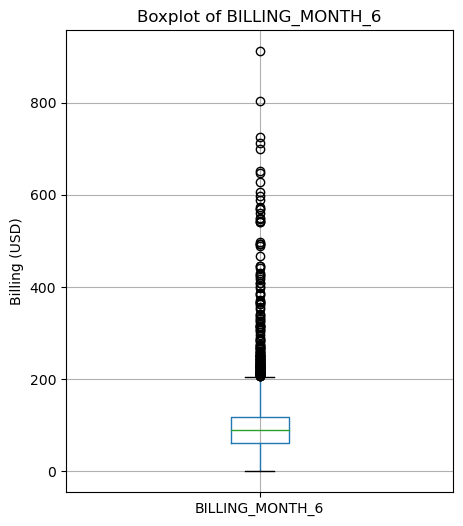

In [17]:
#1st boxplot

plt.figure(figsize=(5, 6))
filtered_df.boxplot(column='DATA_TRAFFIC_MONTH_6')
plt.title('Boxplot of DATA_TRAFFIC_MONTH_6')
plt.ylabel('Data Traffic (Mbps)')
plt.show()

#2nd boxplot
plt.figure(figsize=(5, 6))
filtered_df.boxplot(column='VOICE_TRAFFIC_MONTH_6')
plt.title('Boxplot of VOICE_TRAFFIC_MONTH_6')
plt.ylabel('Voice Traffic (minutes)')
plt.show()

#3rd boxplot
plt.figure(figsize=(5, 6))
filtered_df.boxplot(column='BILLING_MONTH_6')
plt.title('Boxplot of BILLING_MONTH_6')
plt.ylabel('Billing (USD)')
plt.show()

To determine the threshold, we usually apply 1.5 times the interquartile range.
From the first plot, a threshold of around 10,000 can be chosen based on the visualization.
From the second plot, the display suggests a threshold of about 300.
From the third plot, a reasonable threshold would be around 200

,DEVICE_VALUE,BILLING_MONTH_1,BILLING_MONTH_2,BILLING_MONTH_3,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,...,VOICE_TRAFFIC_MONTH_4,VOICE_TRAFFIC_MONTH_5,VOICE_TRAFFIC_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DURATION_LINE
DEVICE_VALUE,1.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.0
BILLING_MONTH_1,0.1,1.0,0.7,0.8,0.8,0.8,0.8,0.2,0.2,0.2,...,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1
BILLING_MONTH_2,0.1,0.7,1.0,0.7,0.7,0.7,0.7,0.2,0.2,0.2,...,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1
BILLING_MONTH_3,0.1,0.8,0.7,1.0,0.7,0.7,0.8,0.2,0.2,0.2,...,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1
BILLING_MONTH_4,0.1,0.8,0.7,0.7,1.0,0.8,0.8,0.2,0.2,0.2,...,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1
BILLING_MONTH_5,0.1,0.8,0.7,0.7,0.8,1.0,0.8,0.2,0.2,0.2,...,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1
BILLING_MONTH_6,0.1,0.8,0.7,0.8,0.8,0.8,1.0,0.2,0.2,0.2,...,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1
DATA_TRAFFIC_MONTH_1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,1.0,0.8,0.7,...,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,-0.0
DATA_TRAFFIC_MONTH_2,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.8,1.0,1.0,...,0.1,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0
DATA_TRAFFIC_MONTH_3,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.7,1.0,1.0,...,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0


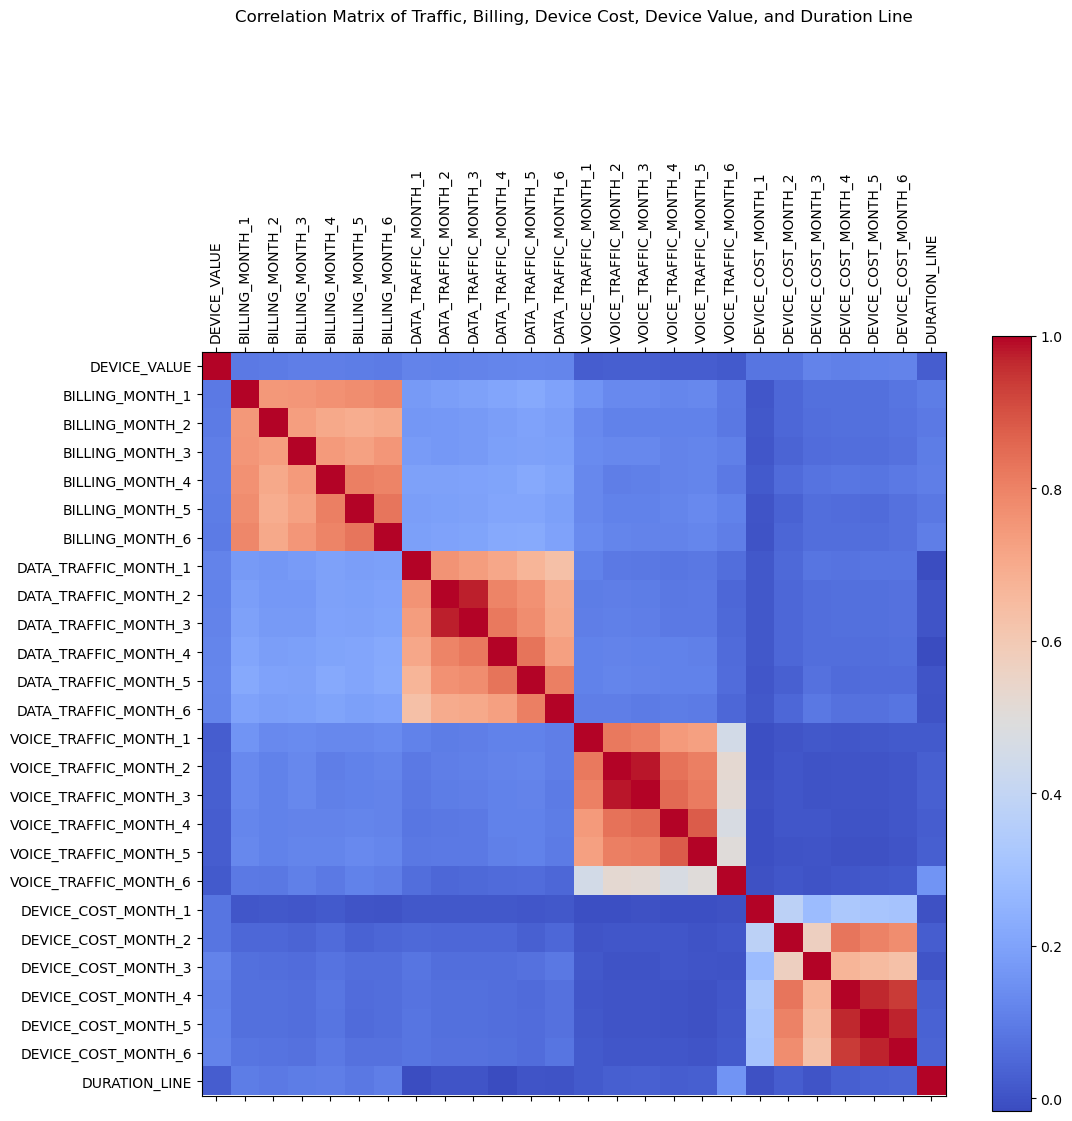

In [18]:
# We select relevant columns for correlation analysis(given by the statement)
corr_columns = [
    'DEVICE_VALUE',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
    'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
    'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6',
    'DURATION_LINE'
]

# We compute correlation matrix, the function also was given by the statement
corr_matrix = dataset_imputed[corr_columns].corr(method='pearson',numeric_only=True)

# We display correlation matrix as a table
display(corr_matrix)

# And we plot correlation matrix as a color matrix
plt.figure(figsize=(12, 10))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.colorbar()
plt.title('Correlation Matrix of Traffic, Billing, Device Cost, Device Value, and Duration Line', pad=100)
plt.show()

The correlation matrix indicates the relationships between the variables in the dataset. Data traffic and billing appear to be strongly correlated, as their correlation coefficient is close to 1. In contrast, voice traffic shows little to no correlation with monthly device cost.

## 2.3. Date management and period calculation

In [19]:
# We find the maximum LAST_DEVICE_CHANGE value (ignoring nans)
max_last_device_change = int(dataset_imputed['LAST_DEVICE_CHANGE'].max())

# We convert to string in YYYYMMDD format
max_last_device_change_str = str(max_last_device_change)

# And convert to datetime object
latest_change = datetime.datetime.strptime(max_last_device_change_str, "%Y%m%d")
print(latest_change)

# finally we add 30 days to get 'now'
now = latest_change + datetime.timedelta(days=30)
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


In [20]:
# We convert LAST_DEVICE_CHANGE to datetime
last_device_change_dt = pd.to_datetime(dataset_imputed['LAST_DEVICE_CHANGE'], format='%Y%m%d')

#  difference in months ( 30 days) between now and LAST_DEVICE_CHANGE
months_diff = ((now - last_device_change_dt) / (30 * datetime.timedelta(days=1))).fillna(0).astype(int)

# we replace MONTHS_LAST_DEVICE column with the calculated difference
dataset_imputed['MONTHS_LAST_DEVICE'] = months_diff

In [21]:
#We convert LINE_ACTIVATION_DATE to datetime, handling nans
line_activation_dt = pd.to_datetime(dataset_imputed['LINE_ACTIVATION_DATE'], format='%Y%m%d')

#  DURATION_LINE in days as the difference between 'now' and LINE_ACTIVATION_DATE
dataset_imputed['DURATION_LINE'] = (now - line_activation_dt).dt.days

#average duration in days and convert to years
avg_duration_days = dataset_imputed['DURATION_LINE'].mean()
avg_duration_years = avg_duration_days / 365.25

print(f"Average DURATION_LINE: {avg_duration_days:.1f} days (aprox : {avg_duration_years:.2f} years)")

Average DURATION_LINE: 1953.3 days (aprox : 5.35 years)



## 2.4. Standarization and scaling of numerical variables

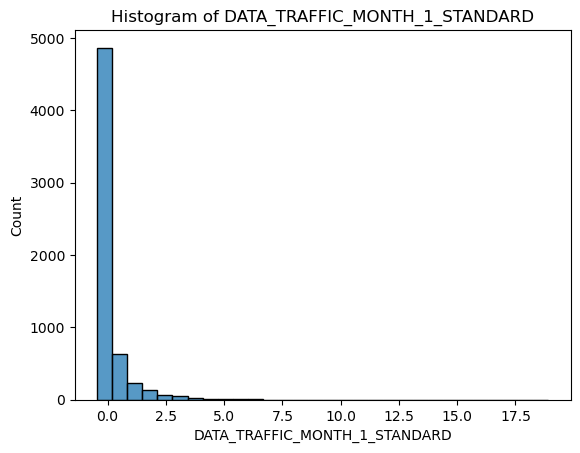

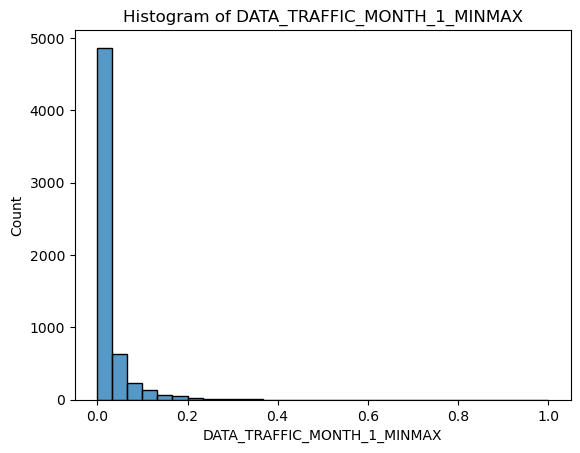

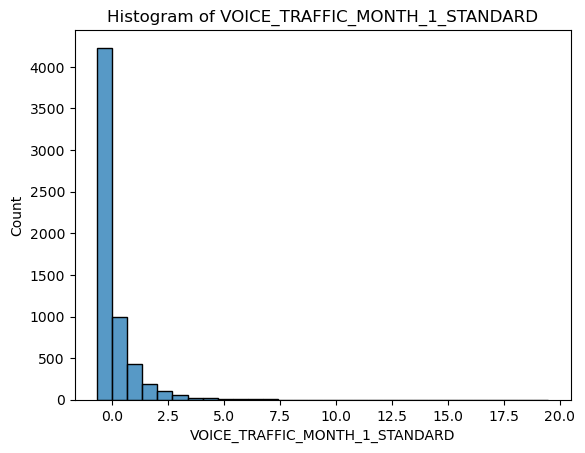

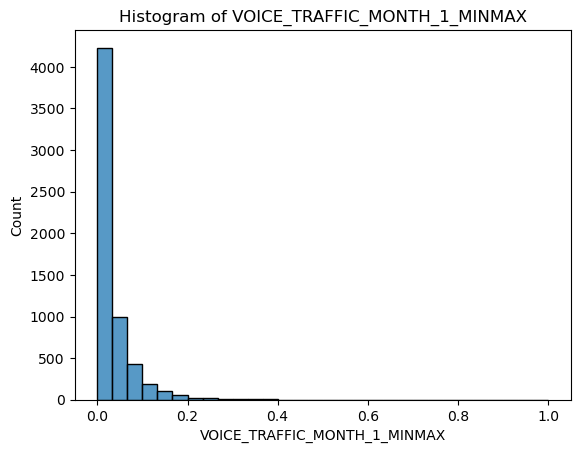

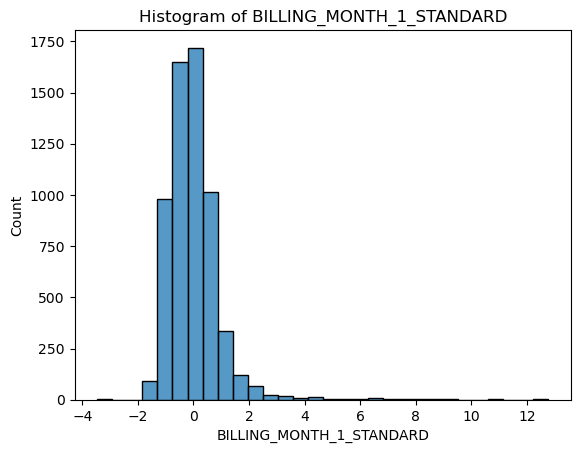

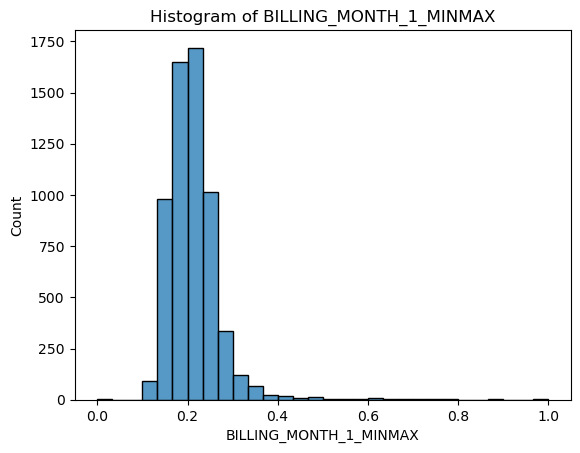

In [22]:
# specified columns
columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']

for col in columns_to_scale:
    # Standardization
    dataset_imputed[f'{col}_STANDARD'] = StandardScaler().fit_transform(dataset_imputed[[col]])
    # Min-max scaling
    dataset_imputed[f'{col}_MINMAX'] = MinMaxScaler().fit_transform(dataset_imputed[[col]])

    # Plot histogram for standarize 
    ax_std = sns.histplot(dataset_imputed[f'{col}_STANDARD'], bins=30, kde=False)
    ax_std.set(title=f'Histogram of {col}_STANDARD', xlabel=f'{col}_STANDARD', ylabel='Count')
    plt.show()

    # Plot histogram for min-max 
    ax_mm = sns.histplot(dataset_imputed[f'{col}_MINMAX'], bins=30, kde=False)
    ax_mm.set(title=f'Histogram of {col}_MINMAX', xlabel=f'{col}_MINMAX', ylabel='Count')
    plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [23]:
# Encode PREVIOUS_DEVICE_BRAND as integers using LabelEncoder
dataset_imputed['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(dataset_imputed['PREVIOUS_DEVICE_BRAND'])


In [24]:
# Convert PREVIOUS_DEVICE_MANUF to dummy binary variables using one-hot encoding
manuf_dummies = pd.get_dummies(dataset_imputed['PREVIOUS_DEVICE_MANUF'], prefix='manuf')
dataset_imputed_with_dummies = dataset_imputed.join(manuf_dummies)
display(dataset_imputed_with_dummies)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,manuf_Telit Communications SpA,manuf_Topmax Glory Limited,manuf_Umi Network Technology Co Limited,manuf_United Mobile,manuf_United Time Hong Kong Ltd,manuf_Vikin Communication Technology Co Limited,manuf_Vogtec (H.K) Co Ltd,manuf_Xiaomi Communications Co Ltd,manuf_ZTE Corporation,manuf_u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.2,530.8,530.8,781.1,399.0,1169.4,47.5,...,0,0,0,0,0,0,0,0,0,0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.2,272.3,272.3,704.9,412.7,365.1,3.7,...,0,0,0,0,0,0,0,0,0,0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.6,264.1,264.1,348.5,380.4,250.7,26.1,...,0,0,0,0,0,0,0,0,0,0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.5,836.1,836.1,691.6,146.8,302.5,175.7,...,0,0,0,0,0,0,0,0,0,0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.1,2659.1,2659.1,2435.0,2054.0,1553.1,383.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.3,5755.1,5755.1,5290.1,2917.5,4494.5,597.8,...,0,0,0,0,0,0,0,0,0,0
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.1,14820.2,14820.2,19684.5,10024.1,7423.1,247.5,...,0,0,0,0,0,0,0,0,0,0
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.8,335.0,335.0,171.9,555.7,425.7,88.5,...,0,0,0,0,0,0,0,0,0,0
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.2,155.5,155.5,51.8,62.4,230.5,38.5,...,0,0,0,0,0,0,0,0,0,0


## 2.6. Feature generation

In [25]:
#To do this part, we will create a function that creates the new features for a given prefix, the function takes two arguments: the DataFrame and the prefix string.

def add_agg_features(df, prefix):
    # We generate the column names for months 1 to 6 based on the prefix
    cols = [f"{prefix}_MONTH_{i}" for i in range(1, 7)]
    #And we compute the new features
    df[f"{prefix}_MEAN"] = df[cols].mean(axis=1)
    df[f"{prefix}_MAX"] = df[cols].max(axis=1)
    df[f"{prefix}_MIN"] = df[cols].min(axis=1)
    df[f"{prefix}_RANGE"] = df[f"{prefix}_MAX"] - df[f"{prefix}_MIN"]
# We apply the function for each specified prefix
for prefix in ["DATA_TRAFFIC", "VOICE_TRAFFIC", "BILLING", "DEVICE_COST"]:
    add_agg_features(dataset_imputed, prefix)

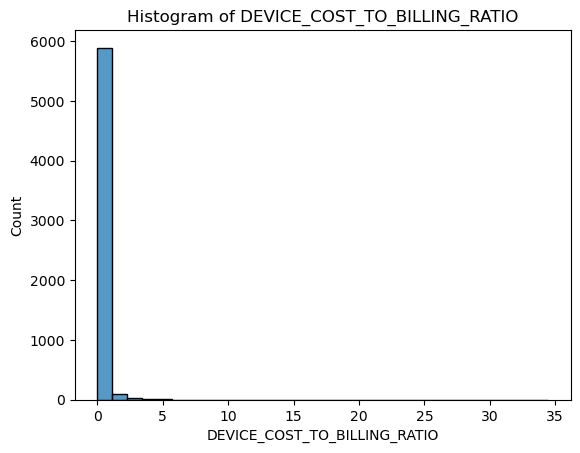

In [26]:
# we create DEVICE_COST_TO_BILLING_RATIO column (ratio between DEVICE_COST_MEAN and BILLING_MEAN)
dataset_imputed['DEVICE_COST_TO_BILLING_RATIO'] = dataset_imputed['DEVICE_COST_MEAN'] / dataset_imputed['BILLING_MEAN']

# and plot the distribution
ax = sns.histplot(dataset_imputed['DEVICE_COST_TO_BILLING_RATIO'].dropna(), bins=30, kde=False)
ax.set(title='Histogram of DEVICE_COST_TO_BILLING_RATIO', xlabel='DEVICE_COST_TO_BILLING_RATIO', ylabel='Count')
plt.show()


The distribution  is highly right-skewed, with most values  near zero . The distribution  it is more similar to an exponential or log-normal distribution due to the heavy skew.But it is dificult to recognize this distribution due to its shape

## 2.7. Text parsing/processing

In [27]:
# We split PURCHASED_DEVICE into code, manufacturer, and model using the function given by the statement. Here we are setting n=1 to split only the code.
split_device = dataset_imputed['PURCHASED_DEVICE'].str.split('_', n=1, expand=True)
# As the first part is the code, we assign it to a new column
dataset_imputed['PURCHASED_DEVICE_CODE'] = split_device[0]

# The second part contains manufacturer and model, we split it again by the first space and then the first part is the manufacturer and the second part is the model
manufacturer_model = split_device[1].str.split(' ', n=1, expand=True)
dataset_imputed['PURCHASED_DEVICE_MANUFACTURER'] = manufacturer_model[0]
dataset_imputed['PURCHASED_DEVICE_MODEL'] = manufacturer_model[1]

# We display the new columns along with the original PURCHASED_DEVICE column
display(dataset_imputed[['PURCHASED_DEVICE', 'PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']])

,PURCHASED_DEVICE,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [28]:
# Table: Number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER
purchased_manufacturer_counts = dataset_imputed['PURCHASED_DEVICE_MANUFACTURER'].value_counts(dropna=False).reset_index()
purchased_manufacturer_counts.columns = ['PURCHASED_DEVICE_MANUFACTURER', 'count']
display(purchased_manufacturer_counts)

# Table: Number of devices per manufacturer in PREVIOUS_DEVICE_MANUF
previous_manuf_counts = dataset_imputed['PREVIOUS_DEVICE_MANUF'].value_counts(dropna=False).reset_index()
previous_manuf_counts.columns = ['PREVIOUS_DEVICE_MANUF', 'count']
display(previous_manuf_counts)

,PURCHASED_DEVICE_MANUFACTURER,count
0,LG,3598
1,SAMSUNG,1111
2,MOTOROLA,642
3,APPLE,461
4,ALCATEL,269
5,ASUS,2


,PREVIOUS_DEVICE_MANUF,count
0,Samsung Korea,1911
1,Apple Inc,1524
2,"Motorola Mobility LLC, a Lenovo Company",869
3,LG Electronics Inc.,506
4,TCL Communication Ltd,282
...,...,...
63,Motorola,1
64,Ha Wah Technology Electronic Limited,1
65,Group Acquisitions Limited,1
66,Hongkong IPRO Technology Co Limited,1


## 2.8. Splitting and sampling a dataset

In [29]:
# Split the dataset_imputed into train (70%) and test (30%) sets
train_df, test_df = train_test_split(dataset_imputed, test_size=0.3, random_state=42)

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (4258, 60)
Test set shape: (1825, 60)


In [30]:
# Compute main statistics for train and test datasets
stats_columns = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']

train_stats = train_df[stats_columns].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
test_stats = test_df[stats_columns].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Training set statistics:")
display(train_stats)

print("Test set statistics:")
display(test_stats)

Training set statistics:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,4258.0,4258.0,4258.0
mean,2636.4,131.3,99.2
std,5977.5,198.2,61.3
min,0.0,0.0,-124.5
25%,0.0,9.5,63.9
50%,408.5,60.8,93.0
75%,2740.1,172.3,121.1
max,100260.0,3132.1,926.4


Test set statistics:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,1825.0,1825.0,1825.0
mean,2451.5,131.6,100.5
std,5400.9,218.3,72.4
min,0.0,0.0,-101.0
25%,0.0,11.1,63.0
50%,322.8,67.0,93.0
75%,2702.9,163.2,120.8
max,112421.2,4113.0,911.7


Yes they match since they share very similar values.

# 3. Comparing iPhone and Samsung J series users

In [31]:
# Create dataframe for Apple iPhone users
apple_iphone_users = dataset_imputed[
    # We filter rows where PURCHASED_DEVICE_MANUFACTURER is 'Apple' and PURCHASED_DEVICE_MODEL starts with 'iPhone'
    (dataset_imputed['PURCHASED_DEVICE_MANUFACTURER'].str.upper() == 'APPLE') &
    (dataset_imputed['PURCHASED_DEVICE_MODEL'].str.upper().str.startswith('IPHONE'))
]

# Create dataframe for Samsung J series users
samsung_j_users = dataset_imputed[
    # We filter rows where PURCHASED_DEVICE_MANUFACTURER is 'Samsung' and PURCHASED_DEVICE_MODEL starts with 'J'
    (dataset_imputed['PURCHASED_DEVICE_MANUFACTURER'].str.upper() == 'SAMSUNG') &
    (dataset_imputed['PURCHASED_DEVICE_MODEL'].str.upper().str.startswith('J'))
]

display(apple_iphone_users)
display(samsung_j_users)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.2,2196.6,2196.6,1815.7,2101.7,3224.3,206.9,...,115.0,71.3,13.0,13.0,13.0,0.0,0.1,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.0,20170901.0,990.3,1011.1,1011.1,1026.0,2778.4,1823.0,102.9,...,61.0,3.0,124.0,124.0,124.0,0.0,2.0,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.0,20161001.0,3916.9,2703.3,2703.3,1860.9,3112.8,2625.4,160.9,...,192.8,106.0,122.0,183.0,0.0,183.0,0.5,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,20170901.0,1017.5,1079.3,1079.3,1179.0,1193.0,1070.2,303.2,...,149.0,39.8,7.0,7.0,7.0,0.0,0.0,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.0,20170901.0,257.4,604.1,604.1,1394.2,102.6,107.8,117.3,...,75.0,60.0,7.0,7.0,7.0,0.0,0.1,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.0,20171001.0,8028.2,4791.4,4791.4,4890.2,6867.4,4825.1,31.4,...,70.0,3.0,84.2,252.7,0.0,252.7,1.2,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,3636.1,3975.2,3975.2,4893.0,4364.0,3992.3,18.5,...,70.0,0.5,0.0,0.0,0.0,0.0,0.0,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.0,20170101.0,1023.1,2831.4,2831.4,3015.2,2819.6,1135.8,51.7,...,124.0,3.0,13.0,13.0,13.0,0.0,0.1,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,2432.9,5159.8,5159.8,3041.4,2613.6,2976.5,85.4,...,70.0,0.0,0.0,0.0,0.0,0.0,0.0,DGAP08163000,APPLE,IPHONE XR 64GB PRETO


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,171.3,...,113.8,56.5,0.0,0.0,0.0,0.0,0.0,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.0,20160801.0,4.5,464.1,695.1,223.3,223.3,247.9,298.0,...,45.6,24.3,2.5,15.0,0.0,15.0,0.0,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.0,20141001.0,8396.9,9907.5,9907.5,5994.0,6872.6,5246.0,153.0,...,146.9,93.1,47.3,71.0,0.0,71.0,0.3,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1545.0,20140101.0,2047.3,1598.0,1598.0,1501.0,843.1,1631.1,74.4,...,184.0,5.6,0.0,0.0,0.0,0.0,0.0,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,873.0,20140101.0,4185.3,2036.6,2036.6,424.3,2934.9,2847.6,61.0,...,113.0,43.0,0.0,0.0,0.0,0.0,0.0,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.0,20170101.0,5344.5,3875.5,3875.5,2059.9,6818.6,2639.7,903.3,...,78.1,40.4,33.0,33.0,33.0,0.0,0.4,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1137.0,NaN,4343.9,5593.4,5593.4,4548.7,80.5,1497.1,10.6,...,118.0,3.2,0.0,0.0,0.0,0.0,0.0,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI3...,441.0,20180201.0,0.0,0.0,0.0,0.0,0.0,0.0,161.3,...,70.0,8.3,13.0,13.0,13.0,0.0,0.2,TGSA28564007,SAMSUNG,J105 SMART PRETO PPB/PI324/14
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.0,20161001.0,5656.5,4798.9,4798.9,5056.9,4584.0,5088.2,104.7,...,103.0,110.2,0.0,0.0,0.0,0.0,0.0,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


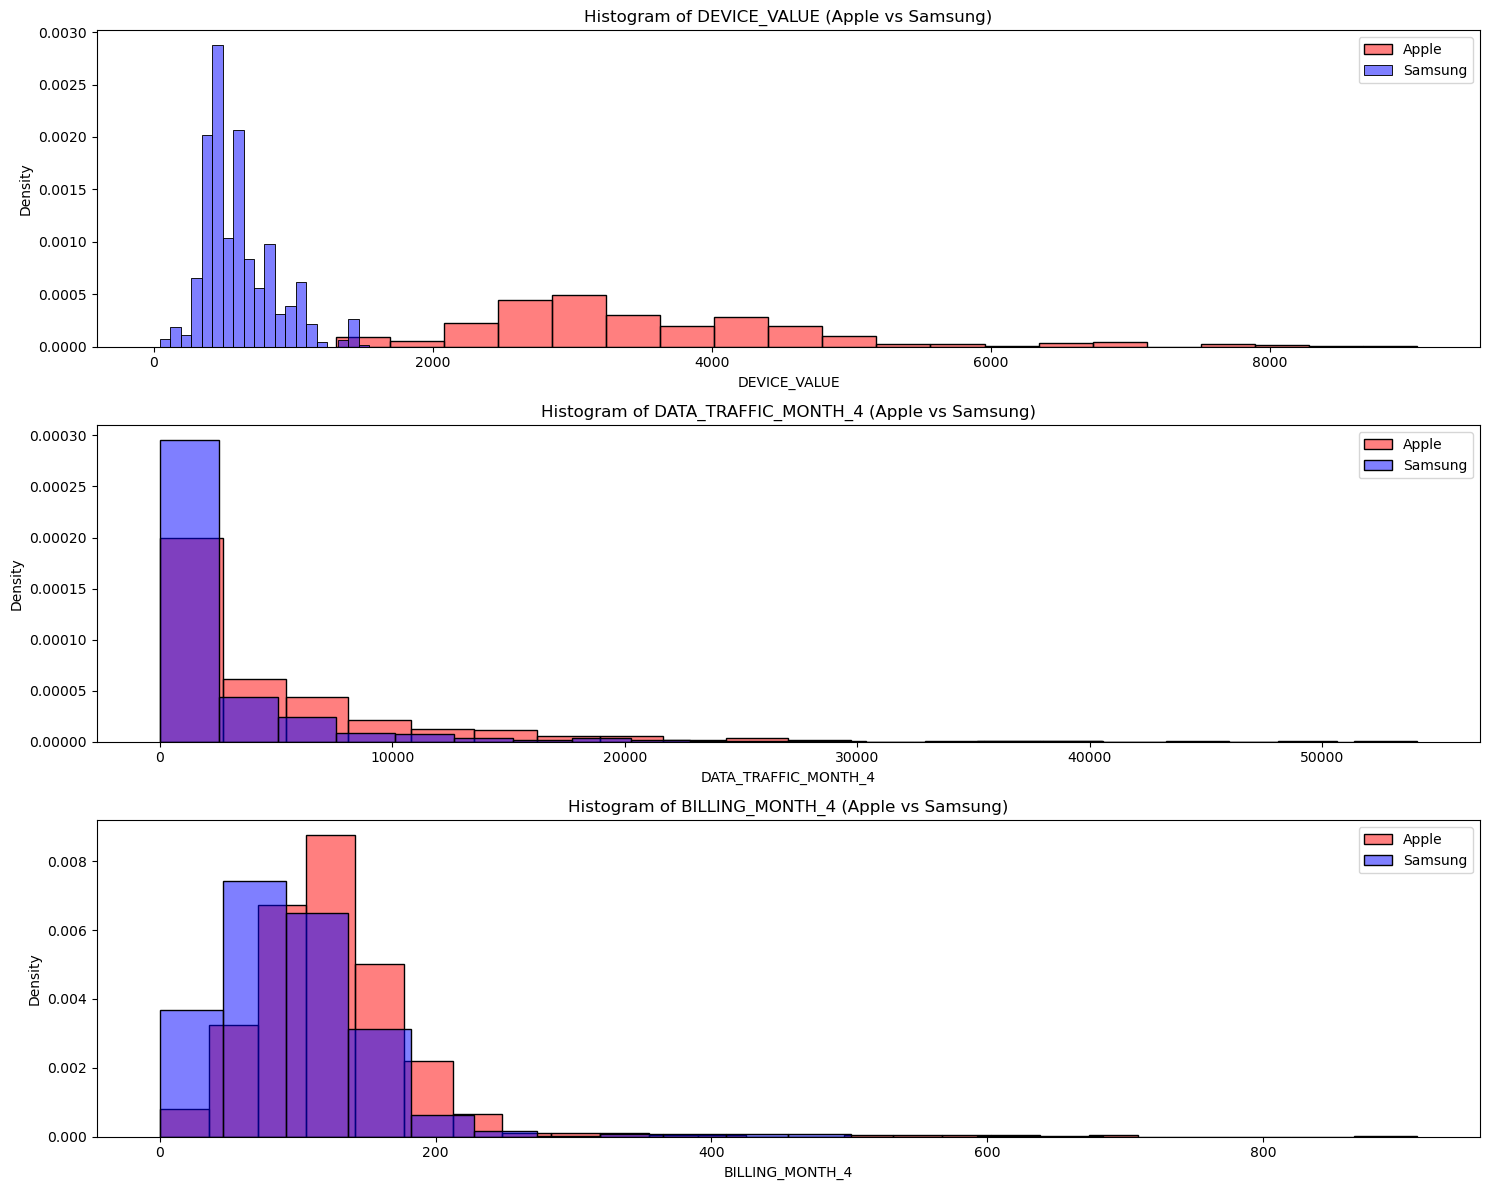

In [ ]:
#We select the variables to compare
variables_to_compare = ["DEVICE_VALUE", "DATA_TRAFFIC_MONTH_4", "BILLING_MONTH_4"]
#And we plot histograms for each variable comparing Apple iPhone users and Samsung J series users
plt.figure(figsize=(15, 12))
for i, var in enumerate(variables_to_compare, 1):
    plt.subplot(3, 1, i)
    sns.histplot(apple_iphone_users[var], bins=20, color='red', label='Apple', alpha=0.5, stat='density')
    sns.histplot(samsung_j_users[var], bins=20, color='blue', label='Samsung', alpha=0.5, stat='density')
    plt.title(f"Histogram of {var} (Apple vs Samsung)")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.legend()
plt.tight_layout()
plt.show()

Clearly the device value is different, Samsung offers lower prices in their devices and apple uses higher values, and also a wider range of values.In the case of data traffic and billing month they share a quite similar distribution.